**1. Fetch the Data**

In [1]:
#Extract CourseProjectDataSet2.zip using python
import zipfile
project_path = "../"
dataset_path = project_path + "CourseProjectDataSet2.zip"
extract_path = "../CourseProjectDataSet2"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
# Load necessary libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read fileList from dataSet2 using glob
fileList = glob.glob(extract_path+'/DataSet2/*/*.csv')
len(fileList)

848

**2. Parse the Files and Read into a DataFrame**

In [4]:
#Create a Dataframe df
df = pd.DataFrame(fileList, columns=['filePath'])
print(df.head())

                                            filePath
0  ../CourseProjectDataSet2/DataSet2\User13\133_M...
1  ../CourseProjectDataSet2/DataSet2\User13\133_M...
2  ../CourseProjectDataSet2/DataSet2\User13\133_M...
3  ../CourseProjectDataSet2/DataSet2\User13\133_M...
4  ../CourseProjectDataSet2/DataSet2\User13\134_M...


In [5]:
# Get the filenames and add to the dataframe
import os
df["file"] = df["filePath"].apply(lambda x: os.path.basename(x))
df.head()

,filePath,file
0,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...
1,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...
2,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...
3,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...
4,../CourseProjectDataSet2/DataSet2\User13\134_M...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...


In [6]:
# Extract Experiment Id and add to the dataframe
df["expId"] = df["file"].apply(lambda x: x.split("_")[0])
df.head()

,filePath,file,expId
0,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
1,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
2,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
3,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
4,../CourseProjectDataSet2/DataSet2\User13\134_M...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...,134


**3. Carry Out Necessary Pre-processing**

In [7]:
# No of files available for each ExperimentId
exp_counts = df['expId'].value_counts()
print(exp_counts)

expId
331     5
133     4
265     4
267     4
268     4
       ..
173     3
327     3
326     3
325     3
326C    1
Name: count, Length: 214, dtype: int64


In [8]:
# Find expIds with count equal to 4
exp_ids_with_count_4 = exp_counts[exp_counts == 4].index

# Filter the DataFrame to keep only rows with expIds with count equal to 4
df = df[df['expId'].isin(exp_ids_with_count_4)]
df.head()

,filePath,file,expId
0,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
1,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
2,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
3,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133
4,../CourseProjectDataSet2/DataSet2\User13\134_M...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...,134


In [9]:
# Find out the number of non_numeric expId
non_numeric_mask = pd.to_numeric(df['expId'], errors='coerce').isna()
df[non_numeric_mask].value_counts()

filePath                                                                                                                         file                                                                                    expId 
../CourseProjectDataSet2/DataSet2\User15\176new_Werable1_2020-10-31T11.04.01.893_F1E55E2FE95F_Accelerometer_100.000Hz_1.5.0.csv  176new_Werable1_2020-10-31T11.04.01.893_F1E55E2FE95F_Accelerometer_100.000Hz_1.5.0.csv  176new    1
../CourseProjectDataSet2/DataSet2\User18\208new_Werable1_2020-10-31T12.17.44.076_F1E55E2FE95F_Gyroscope_100.000Hz_1.5.0.csv      208new_Werable1_2020-10-31T12.17.44.076_F1E55E2FE95F_Gyroscope_100.000Hz_1.5.0.csv      208new    1
../CourseProjectDataSet2/DataSet2\User17\206new_Werable1_2020-10-25T11.51.40.899_F1E55E2FE95F_Accelerometer_100.000Hz_1.5.0.csv  206new_Werable1_2020-10-25T11.51.40.899_F1E55E2FE95F_Accelerometer_100.000Hz_1.5.0.csv  206new    1
../CourseProjectDataSet2/DataSet2\User17\206new_Werable1_2020-10-25T11.51.40.899_F1E55E2F

In [10]:
# Some expId contains *new at the end. Need to remove the text.
def clean_expId(expId):
    if isinstance(expId, str):
        # Remove 'new' at the end and return the number if it's numeric
        cleaned = expId.replace('new', '')  # Remove 'new'
        return cleaned if cleaned.isnumeric() else None  # Keep only if numeric
    return None  # Return None for non-string values (like None)

# Apply the cleaning function to the expId column
df['expId'] = df['expId'].apply(clean_expId)

In [11]:
# There is a file for User26 named '326C'(Special Case)
#Delete row where expId = 326C
df = df[df['expId'] != '326C']

In [12]:
# fills any missing (NaN) values in the expId with 0
df['expId'] = df['expId'].fillna(0).astype(int)
print(df['expId']==0)

0      False
1      False
2      False
3      False
4      False
       ...  
843    False
844    False
845    False
846    False
847    False
Name: expId, Length: 824, dtype: bool


In [13]:
# Extract sensor and frequency value and add to the dataframe
df['sensor'] = df['file'].apply(lambda x: x.split("_")[4])
df['frequency'] = df['file'].apply(lambda x: x.split("_")[5])
df.head()

,filePath,file,expId,sensor,frequency
0,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Accelerometer,100.000Hz
1,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Gyroscope,100.000Hz
2,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Magnetometer,20.000Hz
3,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Pressure,7.330Hz
4,../CourseProjectDataSet2/DataSet2\User13\134_M...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...,134,Accelerometer,100.000Hz


In [14]:
# Define the exp Dictionary
expDic = {1: "Siting and Reading a Book", 2: "Sitting and Writing a Notebook", 3: "Typing using computer", 4: "Browsing", 5: "Moving head, body while sitting", 6: "Moving chair while sitting", 7: "Standup from sitting", 8: "Standing", 9: "Walking", 10: "Running", 11: "Taking Stairs", 12:"Sitting and wear stationary",13:"Standing and wear stationary",14:"Sitting and pickup item",15:"Standing and pickup item"}


In [15]:
# Get Experiment Number and Name
def expName(expNo):
  return expDic[expNo]

def expNo(exp_id):
    if exp_id < 307:
        return ((exp_id + 2) % 15 + 1)
    elif exp_id < 320:
        return ((exp_id + 3) % 15 + 1)
    elif exp_id < 334:
        return ((exp_id + 4) % 15 + 1)
    elif exp_id < 348:
        return ((exp_id + 5) % 15 + 1)
    else:
        return ((exp_id + 6) % 15 + 1)

In [16]:
# Add two new columns to the dataframe : expNo, expName
df["expNo"] = df["expId"].apply(expNo)
df["expName"] = df["expNo"].apply(expName)
df.head()

,filePath,file,expId,sensor,frequency,expNo,expName
0,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Accelerometer,100.000Hz,1,Siting and Reading a Book
1,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Gyroscope,100.000Hz,1,Siting and Reading a Book
2,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Magnetometer,20.000Hz,1,Siting and Reading a Book
3,../CourseProjectDataSet2/DataSet2\User13\133_M...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Pressure,7.330Hz,1,Siting and Reading a Book
4,../CourseProjectDataSet2/DataSet2\User13\134_M...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...,134,Accelerometer,100.000Hz,2,Sitting and Writing a Notebook


**4. Exploratory Data Analysis (EDA)**
- Visualize the data: Create 8-16 graphs for different sensors and activities.




In [17]:
# Defining dataframes for all activities

# Sitting and reading a book
sitting_reading_book_df = df[df['expNo'] == 1]

# Sitting and Writing a Notebook
sitting_writing_notebook_df = df[df['expNo'] == 2]

# Typing using computer
typing_computer_df = df[df['expNo'] == 3]

# Browsing"
browsing_df = df[df['expNo'] == 4]

# Moving head, body while sitting
moving_head_body_df = df[df['expNo'] == 5]

# Moving chair while sitting
moving_chair_df = df[df['expNo'] == 6]

# Standup from sitting
standup_sitting_df = df[df['expNo'] ==7]

# Standing
standing_df = df[df['expNo'] == 8]

# Walking
walking_df = df[df['expNo'] == 9]

# Running
running_df = df[df['expNo'] == 10]

# Taking Stairs
taking_stairs_df = df[df['expNo'] == 11]

# Sitting and wear stationary
sitting_wear_stationary_df = df[df['expNo'] == 12]

# Standing and wear stationary
standing_wear_stationary_df = df[df['expNo'] == 13]

# Sitting and pickup item
sitting_pickup_df = df[df['expNo'] == 14]

# Standing and pickup item
standing_pickup_df = df[df['expNo'] == 15]

In [18]:
# Sitting and reading a book data of all 4 sensor
sitting_reading_book_df['sensor'].value_counts()

sensor
Accelerometer    14
Gyroscope        14
Magnetometer     14
Pressure         14
Name: count, dtype: int64

In [19]:
# Typing using computer data for every expId
typing_computer_df['expId'].value_counts()

expId
135    4
150    4
165    4
180    4
195    4
210    4
225    4
240    4
255    4
270    4
285    4
300    4
314    4
328    4
342    4
Name: count, dtype: int64

In [20]:
# Columns of the moving_chair_df
moving_chair_df.columns.tolist()

['filePath', 'file', 'expId', 'sensor', 'frequency', 'expNo', 'expName']

In [21]:
# Plot figure for accelerometer data
def fig_accelerometer(file):
  data_acc = pd.read_csv(file)
  data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
  fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex = True)

  data_acc = data_acc[['x', 'y', 'z']]

  # Plot x, y, and z axis data
  ax.plot(data_acc['x'], label='X-axis', color='r')
  ax.plot(data_acc['y'], label='Y-axis', color='g')
  ax.plot(data_acc['z'], label='Z-axis', color='b')

  # Adding grid, legend, and labels
  ax.set_title('Accelerometer Data')
  ax.set_xlabel('Time (samples)')
  ax.set_ylabel('Acceleration (m/s²)')
  ax.grid(True)
  ax.legend()
  plt.show()


# Plot figure for gyroscope data
def fig_gyroscope(file):
    # Read the CSV file
    data_gyr = pd.read_csv(file)

    # Rename columns for clarity
    data_gyr.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot x, y, and z axis data
    ax.plot(data_gyr['x'], label='X-axis', color='r')
    ax.plot(data_gyr['y'], label='Y-axis', color='g')
    ax.plot(data_gyr['z'], label='Z-axis', color='b')

    # Adding grid, legend, and labels
    ax.set_title('Gyroscope Data')
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Angular Velocity (rad/s)')
    ax.grid(True)
    ax.legend()

    # Display the plot
    plt.show()


# Plot figure for magnetometer data
def fig_magnetometer(file):
    # Read the CSV file
    data_mag = pd.read_csv(file)

    # Rename columns for clarity
    data_mag.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot x, y, and z axis data
    ax.plot(data_mag['x'], label='X-axis', color='r')
    ax.plot(data_mag['y'], label='Y-axis', color='g')
    ax.plot(data_mag['z'], label='Z-axis', color='b')

    # Adding grid, legend, and labels
    ax.set_title('Magnetometer Data')
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Magnetic Field Strength (µT)')
    ax.grid(True)
    ax.legend()

    # Display the plot
    plt.show()


# Plot figure for pressure data
def fig_pressure(file):
    # Read the CSV file
    data_pres = pd.read_csv(file)

    # Rename columns for clarity
    data_pres.columns = ['timestamp', 'time', 'elapsed', 'pressure']

    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot pressure data over time
    ax.plot(data_pres['elapsed'], data_pres['pressure'], label='Pressure', color='b')

    # Adding grid, legend, and labels
    ax.set_title('Pressure Data')
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Pressure (Pa)')
    ax.grid(True)
    ax.legend()

    # Display the plot
    plt.show()

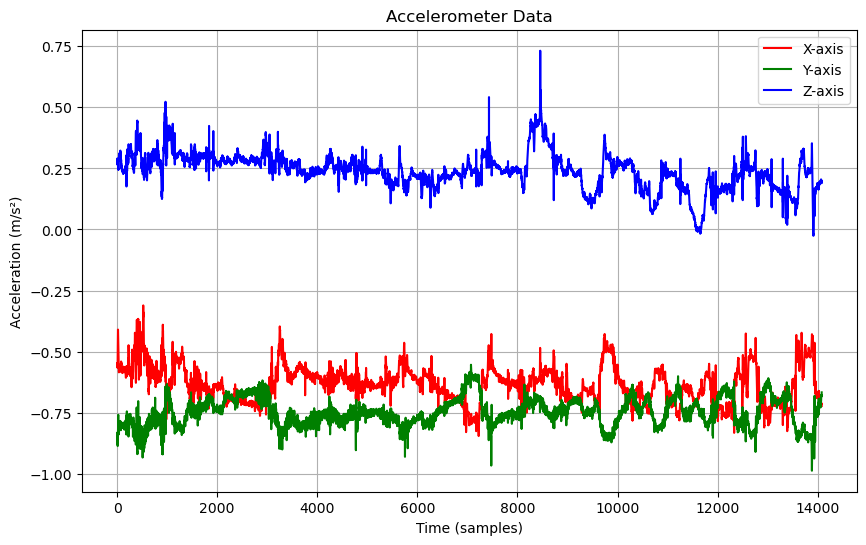

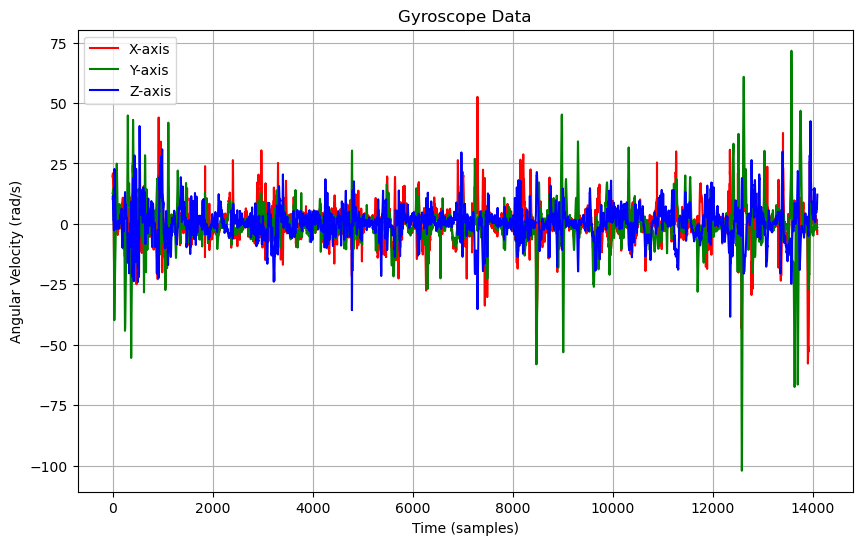

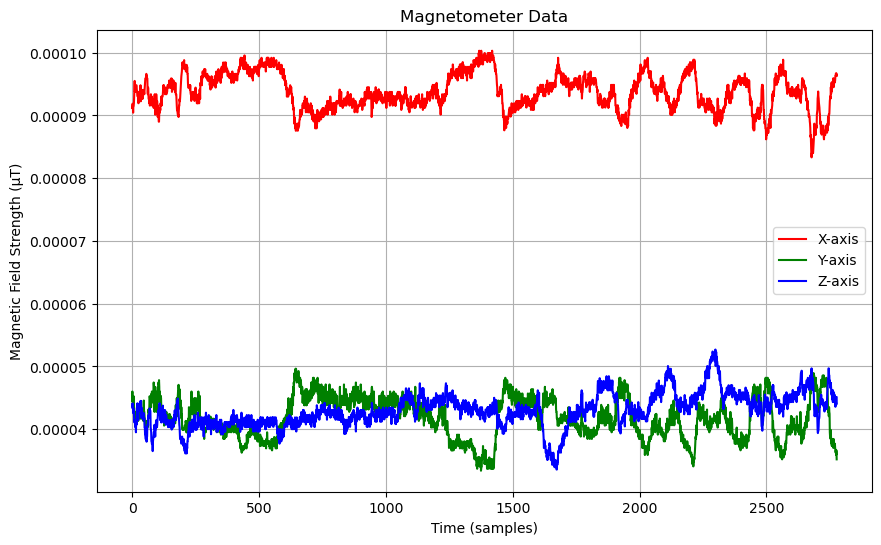

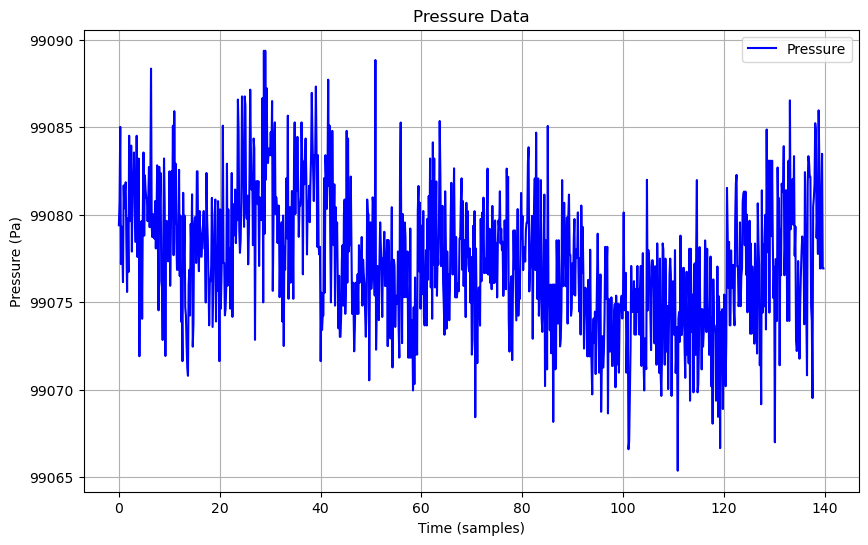

In [22]:
# Plot Sitting and Reading book data for all 4 sensors for User 13.
fig_accelerometer(sitting_reading_book_df[sitting_reading_book_df['sensor'] == 'Accelerometer'].iloc[1, :]['filePath'])
fig_gyroscope(sitting_reading_book_df[sitting_reading_book_df['sensor'] == 'Gyroscope'].iloc[1, :]['filePath'])
fig_magnetometer(sitting_reading_book_df[sitting_reading_book_df['sensor'] == 'Magnetometer'].iloc[1, :]['filePath'])
fig_pressure(sitting_reading_book_df[sitting_reading_book_df['sensor'] == 'Pressure'].iloc[1, :]['filePath'])

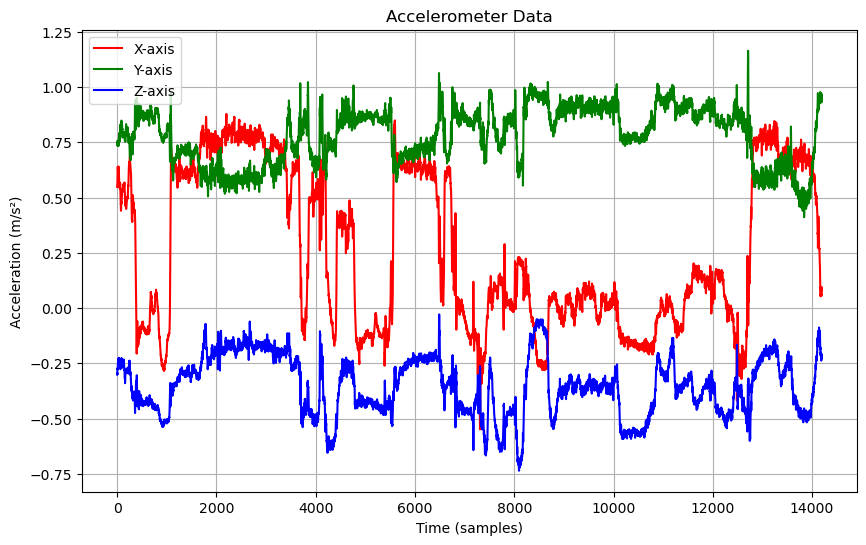

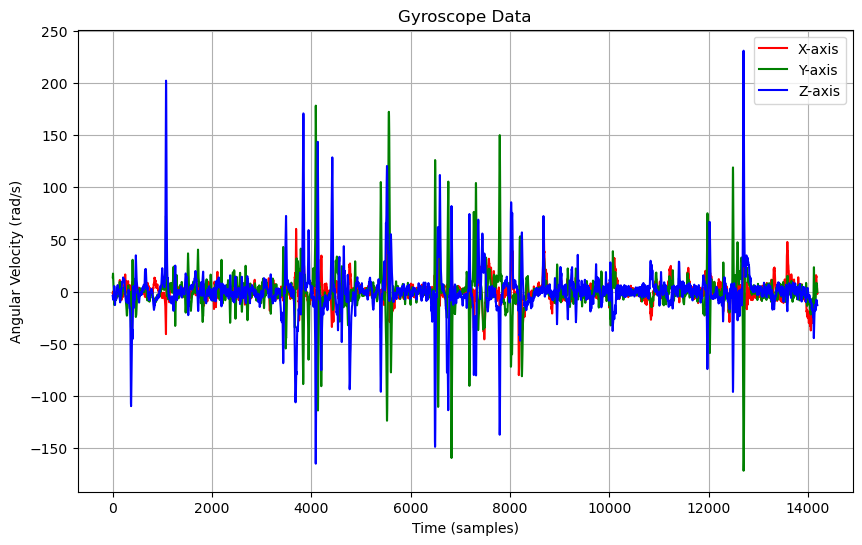

In [23]:
# Plot Typing Computer df data for Accelerometer and Gyroscope for User 20.
fig_accelerometer(typing_computer_df[typing_computer_df['sensor'] == 'Accelerometer'].iloc[7, :]['filePath'])
fig_gyroscope(typing_computer_df[typing_computer_df['sensor'] == 'Gyroscope'].iloc[7, :]['filePath'])

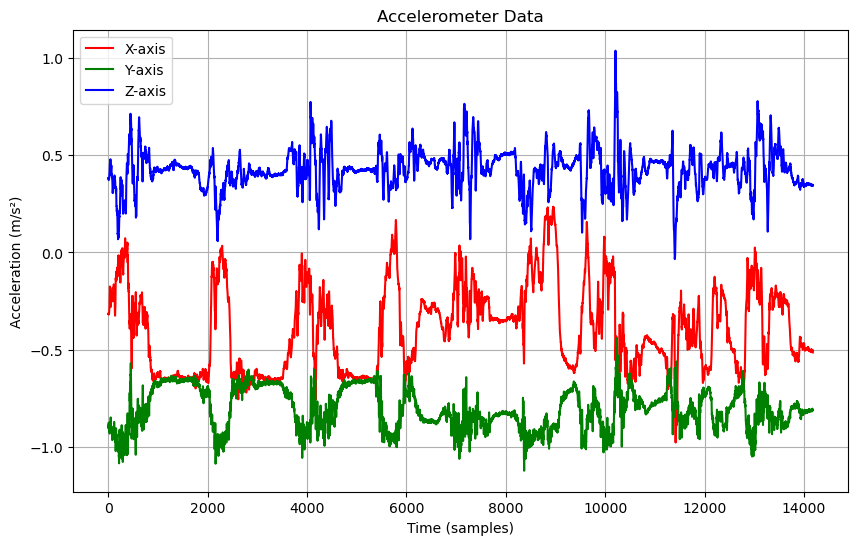

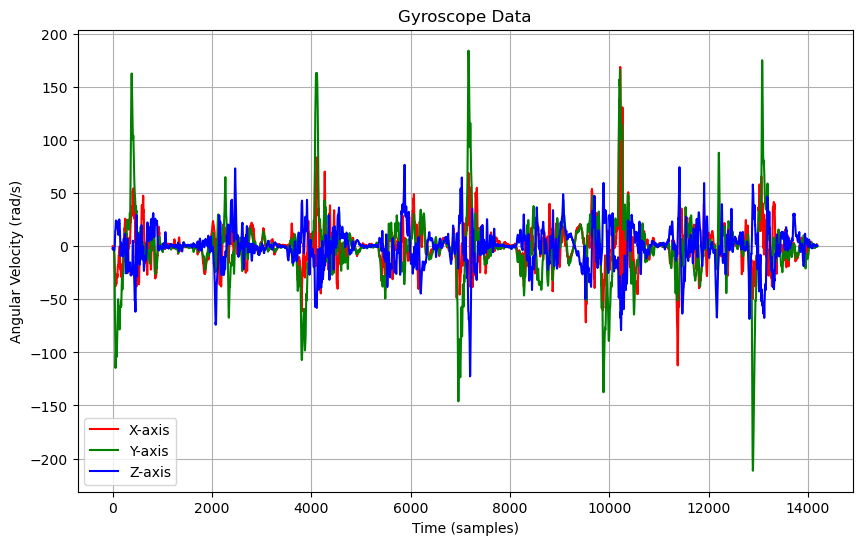

In [24]:
# Plot Moving chair while sitting data for Accelerometer and Gyroscope for User 17.
fig_accelerometer(moving_chair_df[moving_chair_df['sensor'] == 'Accelerometer'].iloc[4, :]['filePath'])
fig_gyroscope(moving_chair_df[moving_chair_df['sensor'] == 'Gyroscope'].iloc[4, :]['filePath'])

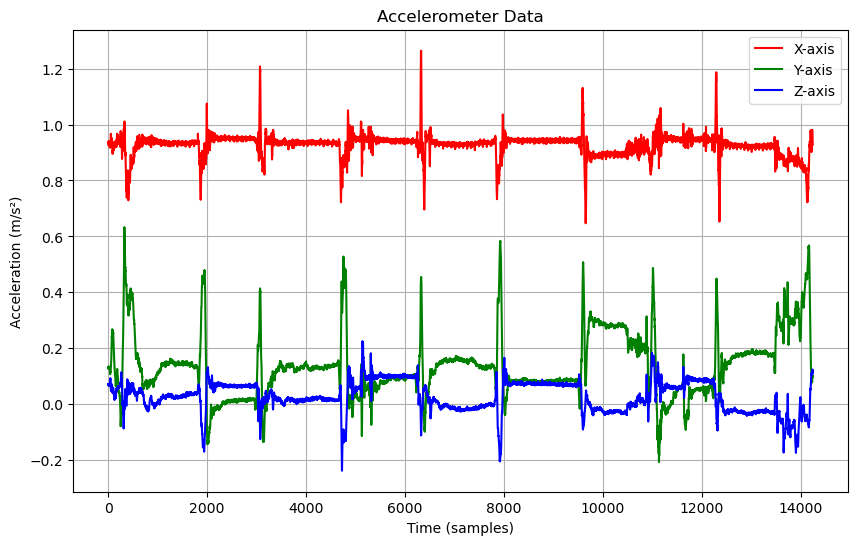

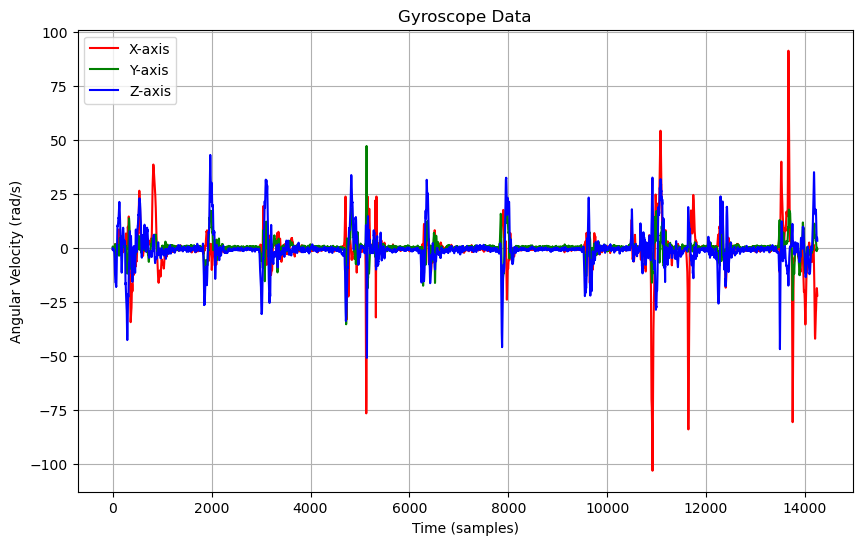

In [25]:
# Plot Standup from sitting data for Accelerometer and Gyroscope for User 27.
fig_accelerometer(standup_sitting_df[standup_sitting_df['sensor'] == 'Accelerometer'].iloc[13, :]['filePath'])
fig_gyroscope(standup_sitting_df[standup_sitting_df['sensor'] == 'Gyroscope'].iloc[13, :]['filePath'])

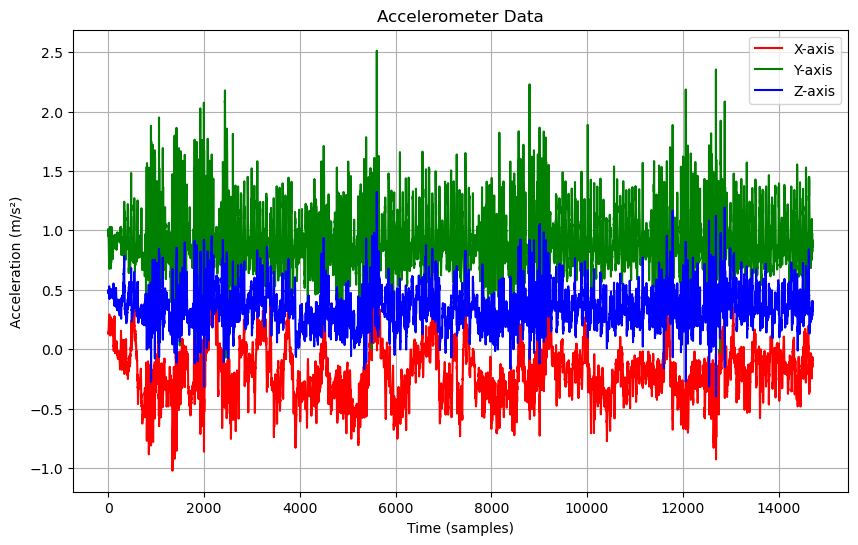

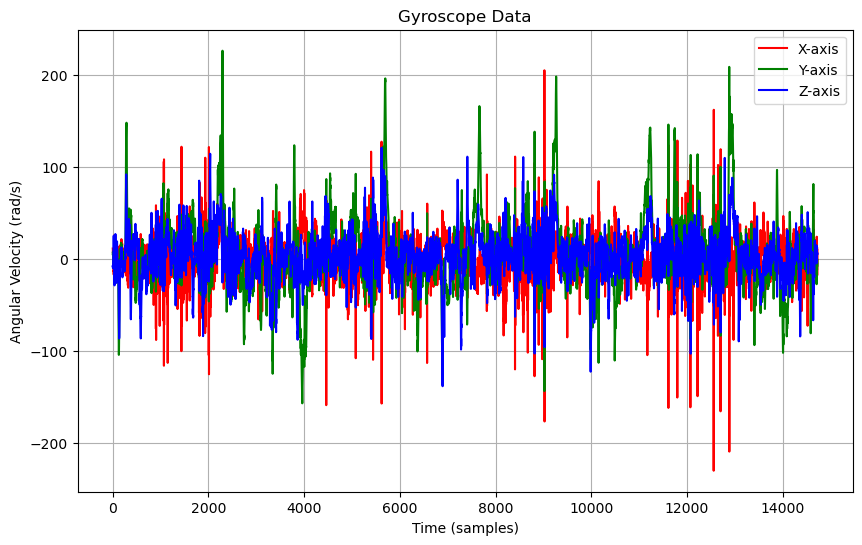

In [26]:
# Plot Taking Stairs data for Accelerometer and Gyroscope for User 13.
fig_accelerometer(taking_stairs_df[taking_stairs_df['sensor'] == 'Accelerometer'].iloc[1, :]['filePath'])
fig_gyroscope(taking_stairs_df[taking_stairs_df['sensor'] == 'Gyroscope'].iloc[1, :]['filePath'])

**5. Perform Windowing of the Data & Perform Feature Extraction Based on Windows**



In [38]:
result_list = []

# Function to calculate features from a window of data
def calculate_features(data_window, prefix=""):
    features = {
        f'{prefix}x_mean': data_window['x'].mean(),
        f'{prefix}y_mean': data_window['y'].mean(),
        f'{prefix}z_mean': data_window['z'].mean(),
        f'{prefix}x_var': data_window['x'].var(),
        f'{prefix}y_var': data_window['y'].var(),
        f'{prefix}z_var': data_window['z'].var(),
        f'{prefix}x_std': data_window['x'].std(),
        f'{prefix}y_std': data_window['y'].std(),
        f'{prefix}z_std': data_window['z'].std(),
        f'{prefix}sum_xyz': data_window[['x', 'y', 'z']].sum().sum(),
        f'{prefix}max_xyz': data_window[['x', 'y', 'z']].max().max(),
        f'{prefix}min_xyz': data_window[['x', 'y', 'z']].min().min(),
        f'{prefix}abs_sum_mean': data_window[['x', 'y', 'z']].abs().sum().mean()
    }
    return features


# Main function for windowing and feature extraction
def process_experiment_data(df, window_size, overlap):
    result_list = []
    step_size = int(window_size * (1 - overlap))

    # Loop over each experiment ID
    for exp_id in df['expId'].unique():
        temp_df = df[df['expId'] == exp_id]

        try:
            # Process accelerometer data
            acc_file_path = temp_df[temp_df['sensor'] == 'Accelerometer'].iloc[0, 0]
            acc_df = pd.read_csv(acc_file_path)
            acc_df.rename(columns={'x-axis (g)': 'x', 'y-axis (g)': 'y', 'z-axis (g)': 'z'}, inplace=True)
            acc_df = acc_df[['x', 'y', 'z']]

            # Process gyroscope data
            gyro_file_path = temp_df[temp_df['sensor'] == 'Gyroscope'].iloc[0, 0]
            gyro_df = pd.read_csv(gyro_file_path)
            gyro_df.rename(columns={'x-axis (deg/s)': 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)': 'z'}, inplace=True)
            gyro_df = gyro_df[['x', 'y', 'z']]

            # Loop through data in windows
            for start in range(0, len(acc_df) - window_size + 1, step_size):
                window_acc_data = acc_df.iloc[start:start + window_size]
                window_gyro_data = gyro_df.iloc[start:start + window_size]

                # Calculate features
                acc_features = calculate_features(window_acc_data, prefix="acc_")
                gyro_features = calculate_features(window_gyro_data, prefix="gyro_")

                # Append features with metadata
                result_list.append({**acc_features, **gyro_features, 'activity_id': temp_df[temp_df['sensor']=='Accelerometer'].iloc[0,5]})

        except Exception as e:
            print(f"Error processing expId {exp_id}: {e}")

    # Convert results to DataFrame
    result_df = pd.DataFrame(result_list)
    return result_df

In [39]:
# Parameters
window_sizes = [100, 200, 300, 400, 500]
overlaps = [0.25, 0.50]
output_dir = project_path + '/data/Processed_Features/'
os.makedirs(output_dir, exist_ok=True)

# Loop through window sizes and overlaps
for window_size in window_sizes:
    for overlap in overlaps:
        features_df = process_experiment_data(df, window_size, overlap)

        features_df = features_df.dropna()
        features_df = features_df.reset_index(drop=True)
        features_df.info()

        # Save to CSV
        file_name = f"W{window_size}_O{int(overlap * 100)}_Features.csv"
        features_df.to_csv(os.path.join(output_dir, file_name), index=False)
        print(f"Saved features: {file_name}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38230 entries, 0 to 38229
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acc_x_mean         38230 non-null  float64
 1   acc_y_mean         38230 non-null  float64
 2   acc_z_mean         38230 non-null  float64
 3   acc_x_var          38230 non-null  float64
 4   acc_y_var          38230 non-null  float64
 5   acc_z_var          38230 non-null  float64
 6   acc_x_std          38230 non-null  float64
 7   acc_y_std          38230 non-null  float64
 8   acc_z_std          38230 non-null  float64
 9   acc_sum_xyz        38230 non-null  float64
 10  acc_max_xyz        38230 non-null  float64
 11  acc_min_xyz        38230 non-null  float64
 12  acc_abs_sum_mean   38230 non-null  float64
 13  gyro_x_mean        38230 non-null  float64
 14  gyro_y_mean        38230 non-null  float64
 15  gyro_z_mean        38230 non-null  float64
 16  gyro_x_var         382